**Aikins Acheampong**

Fall 2024

CS 251: Data Analysis and Visualization

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 3 | Linear Regression

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
- `np.linalg.inv`
- `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
- `np.linalg.norm`
    
**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Run a linear regression

In this task, you will implement linear regression then analyze and plot the results on the Iris dataset. 

### 1a. Import Iris data

- In the below cell, load in the Iris dataset into a `Data` object.
- Print out the object (only showing the first few data samples).
- Create an `LinearRegression` object called `lin_reg` based on the `Data` object that you just created.

In [2]:
iris_data = data.Data('data/iris.csv')
lin_reg = linear_regression.LinearRegression(iris_data)
print(iris_data)

data/iris.csv(150, 5)
Headers: 
	sepal_length   sepal_width   petal_length   petal_width   species
--------------------------------------------------
Showing first 5/150 rows.
5.1   3.5   1.4   0.2   0.0
4.9   3.0   1.4   0.2   0.0
4.7   3.2   1.3   0.2   0.0
4.6   3.1   1.5   0.2   0.0
5.0   3.6   1.4   0.2   0.0



Your code should print something that looks like this:

    -------------------------------
    data/iris.csv (150x5)
    Headers:
    sepal_length	sepal_width	petal_length	petal_width	species
    -------------------------------
    Showing first 5/150 rows.
    5.1	3.5	1.4	0.2	0.0
    4.9	3.0	1.4	0.2	0.0
    4.7	3.2	1.3	0.2	0.0
    4.6	3.1	1.5	0.2	0.0
    5.0	3.6	1.4	0.2	0.0

### 1b. Solve for the linear regression slopes and intercept

Implement the `linear_regression` method to solve the regression model $$\vec{y} = A\vec{c}$$ for the unknown coefficient vector $\vec{c}$. Recall in this equation:
- $A$ is the data matrix of independent variables selected for the regression shape=(`num_data_samps`, `num_ind_vars+1`) with an extra column of 1s tacked on for the intercept.
- $\vec{c}$ is the vector of unknown regression coefficients associated with each independent variable (slopes + intercept) shape=(`num_ind_vars+1`, 1)
- $\vec{y}$ is the dependent variable column vector shape=(`num_data_samps`, 1)

**Tips:**
- The docstring for `linear_regression` instructs you to set all the instance variables. For now, focus on computing $\vec{c}$ (slopes and intercept) and put off computing $R^2$ and the residuals. Use the test code below to help you debug.

#### Test `linear_regression` with one independent variable

In [3]:
lin_reg.linear_regression(['sepal_length'], 'petal_length')

print(f'Your regression fitted slope coefficients have shape\n{lin_reg.slope.shape}\nand the shape should be\n(1, 1)')
print(f'Your regression fitted slope coefficient is\n{lin_reg.slope[0, 0]:.4f}\nand it should be\n1.8584')
print(f'Your regression fitted intercept is\n{lin_reg.intercept:.4f}\nand it should be\n-7.1014')

Your regression fitted slope coefficients have shape
(1, 1)
and the shape should be
(1, 1)
Your regression fitted slope coefficient is
1.8584
and it should be
1.8584
Your regression fitted intercept is
-7.1014
and it should be
-7.1014


#### Test `linear_regression` with multiple independent variables

In [4]:
iris_headers = iris_data.get_headers()
lin_reg.linear_regression(iris_headers[:3], iris_headers[4])

print(f'Your regression fitted slope coefficients have shape\n{lin_reg.slope.shape}\nand the shape should be\n(3, 1)')
print(f'Your regression fitted slope coefficients are\n{lin_reg.slope[:, 0]}\nand it should be\n[-0.23818  0.09568  0.54794]')
print(f'Your regression fitted intercept is\n{lin_reg.intercept:.4f}\nand it should be\n0.0401')

Your regression fitted slope coefficients have shape
(3, 1)
and the shape should be
(3, 1)
Your regression fitted slope coefficients are
[-0.23818  0.09568  0.54794]
and it should be
[-0.23818  0.09568  0.54794]
Your regression fitted intercept is
0.0401
and it should be
0.0401


### 1c. Predict y values from fitted regression model

Implement the `predict` method: Use fitted linear regression model coefficients to make predictions based on the data.

#### Test `predict` with fitted data

In [5]:
iris_filename = 'data/iris.csv'
iris_data_pred = data.Data(iris_filename)
iris_data_pred.limit_samples(100, 105)
iris_headers = iris_data_pred.get_headers()

lin_reg_pred = linear_regression.LinearRegression(iris_data_pred)
lin_reg_pred.linear_regression(iris_headers[:2], iris_headers[3])
y_pred = lin_reg_pred.predict()

print(f'Your model y predictions are\n{np.squeeze(y_pred)} and should be\n[2.48684 1.81579 2.06842 2.01316 2.11579]')
print(f'Your model y predictions shape is\n{y_pred.shape} and should be\n(5, 1)')

Your model y predictions are
[2.48684 1.81579 2.06842 2.01316 2.11579] and should be
[2.48684 1.81579 2.06842 2.01316 2.11579]
Your model y predictions shape is
(5, 1) and should be
(5, 1)


#### Test `predict` with novel data

In [6]:
np.random.seed(0)
# fake test data: 3 data samples, 4 dimensional.
test_slope = np.random.normal(size=(5, 1))
test_X = np.random.normal(size=(3, 5))
lin_reg.slope = test_slope
lin_reg.intercept = np.pi
y_pred = lin_reg.predict(test_X)
print(f'Your model y predictions are\n{np.squeeze(y_pred)} and should be\n[2.18518 5.82409 3.23376]')
print(f'Your model y predictions shape is\n{y_pred.shape} and should be\n(3, 1)')

Your model y predictions are
[2.18518 5.82409 3.23376] and should be
[2.18518 5.82409 3.23376]
Your model y predictions shape is
(3, 1) and should be
(3, 1)


### 1d. Compute linear regression statistics

Implement the following methods then call them from `linear_regression` to compute all the class instance variables from within `linear_regression`.

- `r_squared`: Quality of fit metric for linear regression. See $R^2$ equation below.
- `compute_residuals`: Compute the difference between the regression model predictions and the actual dependent variable values (residuals).
- `compute_mse`: Computes the mean squared error in the predicted y compared the actual y values (see MSE equation below).

**$R^2$ Equation:** $$1 - \frac{E}{S}$$ where $$E = \sum_i \left (y_i - \hat{y}_i \right )^2$$ and $$S =  \sum_i \left (y_i - \bar{y} \right )^2$$ where $y_i$ are the dependent variable values, $\bar{y}_i$ is the mean of the dependent variable values, $\hat{y}_i$ is the y values *predicted* by the regression.

**Equation for MSE:** $$E = \frac{1}{N}\sum_{i=1}^N \left (y_i - \hat{y}_i \right )^2$$

#### Test `linear_regression` method with $R^2$ and residuals

In [7]:
lin_reg.linear_regression(['sepal_length'], 'petal_width')

# test shapes of instance variables
print(f'Shape of your A data array is\n{lin_reg.A.shape} and should be\n(150, 1)')
print(f'Shape of your y dep var vector is\n{lin_reg.y.shape} and should be\n(150, 1)\n')
print(f"Your independent variables are:\n{lin_reg.ind_vars}\nand should be:\n['sepal_length']")
print(f'Your dependent variables are:\n{lin_reg.dep_var}\nand should be:\npetal_width\n')
print(f'Shape of your slope fits are {lin_reg.slope.shape} and should be (1, 1)')

# Test specific values
print(f'Your slope is {lin_reg.slope} and should be [[0.75292]]')
print(f'Your intercept is {lin_reg.intercept:.2f} and should be -3.20')
print(f'Your R^2 is {lin_reg.R2:.2f} and should be 0.67')
print(f'Your 1st few residuals are\n{lin_reg.residuals[:5].T} and should be\n[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]')

Shape of your A data array is
(150, 1) and should be
(150, 1)
Shape of your y dep var vector is
(150, 1) and should be
(150, 1)

Your independent variables are:
['sepal_length']
and should be:
['sepal_length']
Your dependent variables are:
petal_width
and should be:
petal_width

Shape of your slope fits are (1, 1) and should be (1, 1)
Your slope is [[0.75292]] and should be [[0.75292]]
Your intercept is -3.20 and should be -3.20
Your R^2 is 0.67 and should be 0.67
Your 1st few residuals are
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]] and should be
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]


#### Test MSE

In [8]:
# Test with iris data
lin_reg_norm = linear_regression.LinearRegression(iris_data)
lin_reg_norm.linear_regression(['sepal_length'], 'petal_width')
print(f'Your Iris MSE is {lin_reg_norm.compute_mse():.2f} and should be 0.19')

Your Iris MSE is 0.19 and should be 0.19


## Task 2: Visualize linear regression

### 2a. Update `scatter` to support visualizing linear regression results

Implement `scatter` in `linear_regression.py`: Call your `Analysis::scatter` method to make the scatter plot, then handle overlaying the regression line in `LinearRegression::scatter`. **Run test code below.**

#### Test  `scatter` with linear regression

Only run this when you're done implementing all the methods thru `linear_regression`. This should produce:
- A scatter plot with a linear regression line that looks like it makes sense.
- There should be a title with the text "Regression on Iris!" and the $R^2$ value.

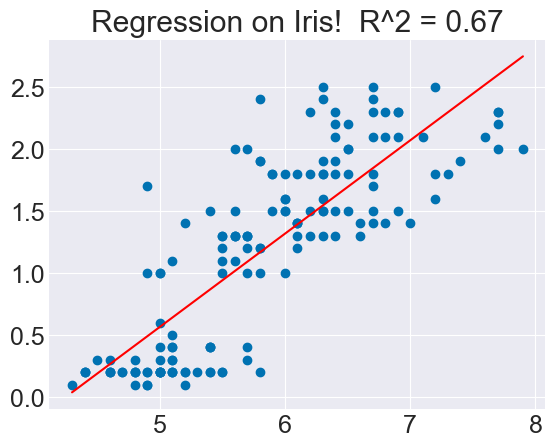

In [9]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)
lin_reg = linear_regression.LinearRegression(iris_data)
lin_reg.linear_regression(['sepal_length'], 'petal_width')

lin_reg.scatter('sepal_length', 'petal_width', 'Regression on Iris!')
lin_reg.show()

### 2b. Update `pair_plot` to add regression lines to each scatter plot

#### Test `pair_plot()`

- Write `pair_plot()` in `linear_regression.py` that calls `Analysis::pair_plot` and extends it  to compute and plot the regression line for each scatter plot (all pairs of variables). For now, you can ignore the keyword argument `hists_on_diag`. **Run test code below.**

Executing the cell below should produce:
- A 5x5 grid of scatter plots.
- (*new*) regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

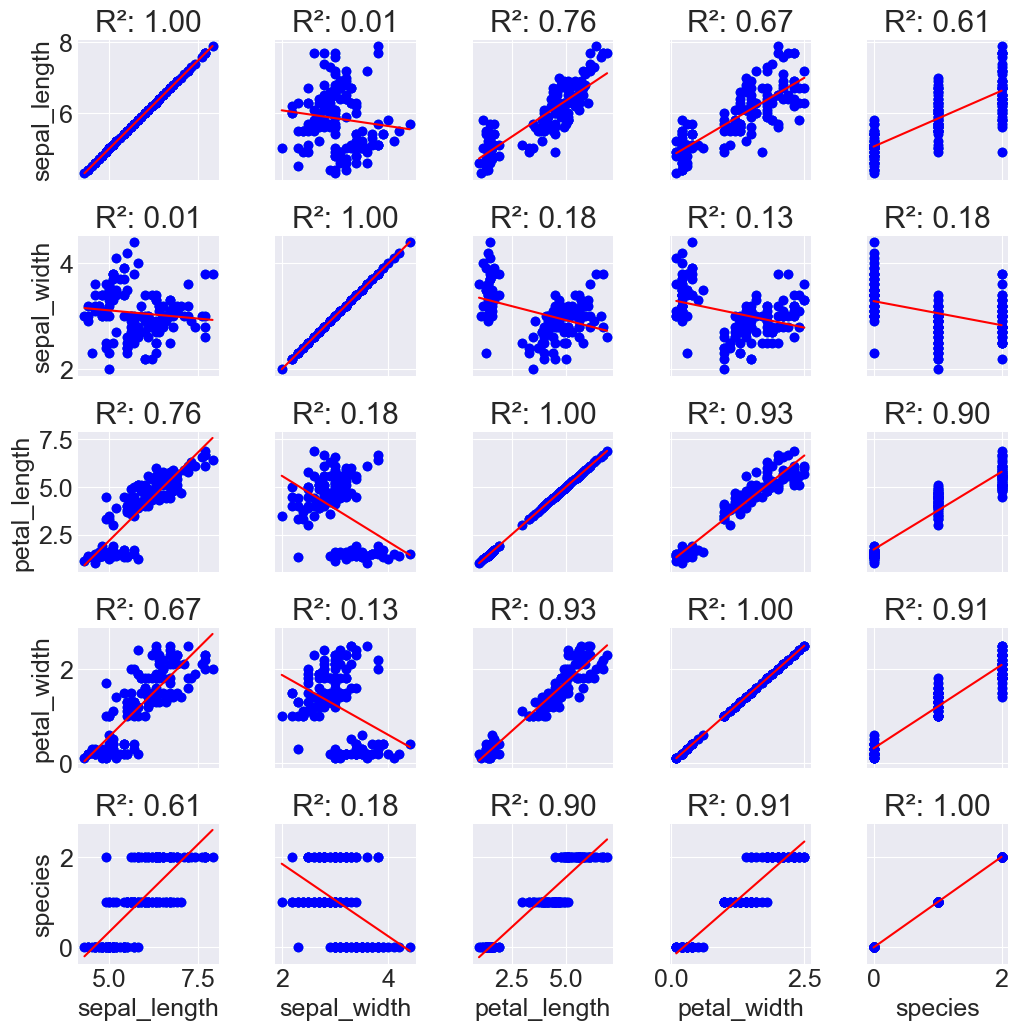

In [10]:
lin_reg.pair_plot(iris_data.get_headers(), hists_on_diag=False)

### 2c. Questions

**Reminder:** You should not use AI in projects, including in your answers to questions.

**Question 1:** How helpful are the regressions plotted along the main diagonal (i.e. going from top-left to bottom-right) toward furthering our understanding of relationships in the dataset? **Why?**

**Answer 1:**
These regressions are not necessarily helpful as they are just a plot of the same variable on both axis.


**Question 2:** Does it make sense to interpret the linear regressions involving the categorical variable (species)? **Why or why not?**

*Hint: Think about the coding of species levels.*

**Answer 2:** 
<br>It wouldn't make sense to interpret the linear regressions involving the categorical variable (species), because they are floats.

**Question 3:** Not counting the relationships on the main diagonal and those involving the `species` categorical variable, identify potential relationships in the dataset. Which variables appear to be most strongly related? Which variables appear least likely to be related?

**Answer 3:** 
<br> petal_length and petal_width have the strongest relationship. The least likely to be related are petal_width and sepal_width.

### 2d. Adding histograms to `pair_plot`

Update your `pair_plot` code to place a histogram along the main diagonal of the `pair_plot` grid (rather than a scatter plot). Do this when the keyword argument `hists_on_diag` is set to `True`. Use (*or adapt*) the following code snippet right before plotting the histogram on row `i` and column `j` of your pair plot. *This code makes the x and y axis scaling different for the histograms (not shared with the scatter plots)*.

```python
numVars = len(data_vars)
axes[i, j].remove()
axes[i, j] = fig.add_subplot(numVars, numVars, i*numVars+j+1)
if j < numVars-1:
    axes[i, j].set_xticks([])
else:
    axes[i, j].set_xlabel(data_vars[i])
if i > 0:
    axes[i, j].set_yticks([])
else:
    axes[i, j].set_ylabel(data_vars[i])
```


Executing the cell below should produce:
- A 5x5 grid of scatter plots (histograms along main diagonal).
- Regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

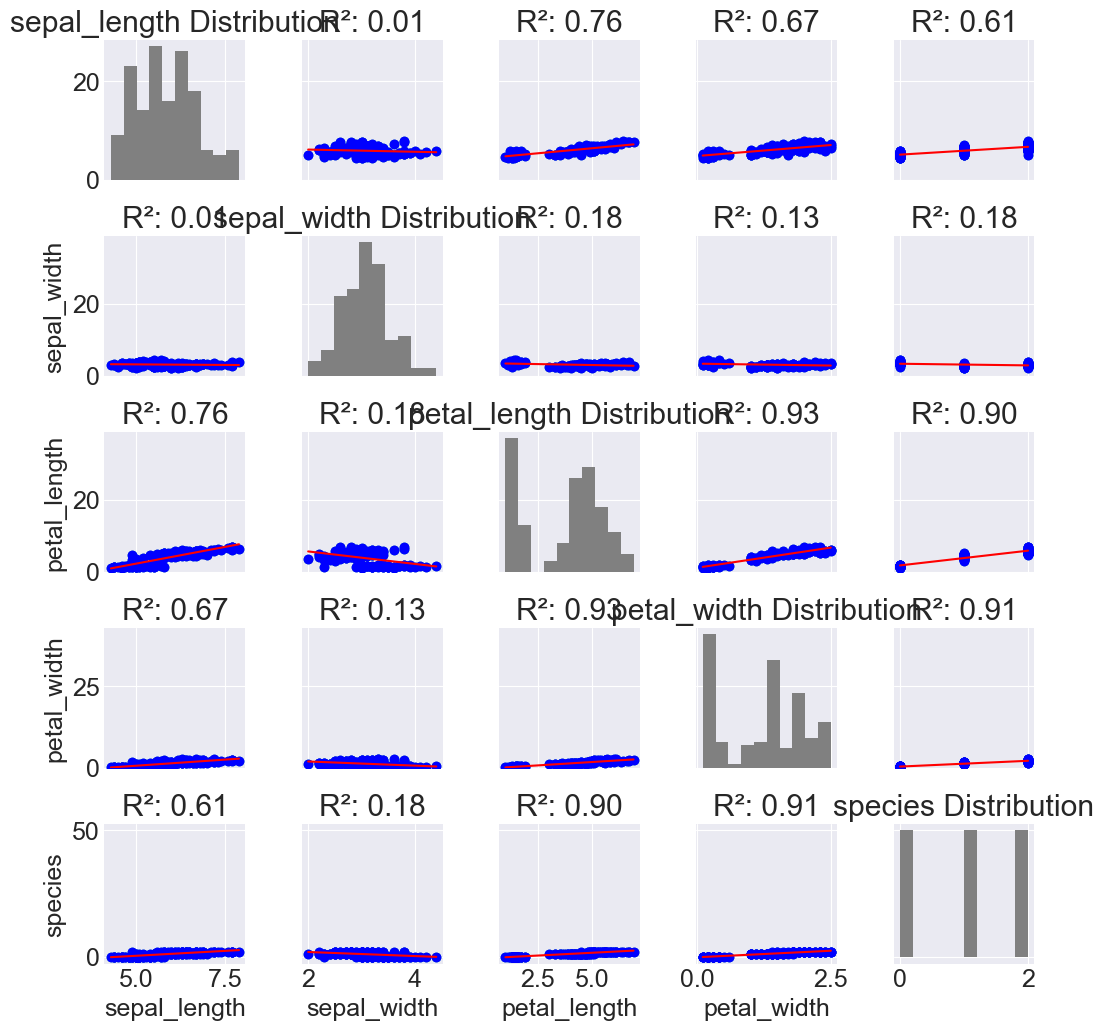

In [11]:
lin_reg.pair_plot(iris_data.get_headers(), hists_on_diag=True)

### 2e. Questions

**Question 4:** Make two observations about the dataset that the histograms help reveal.

**Answer 4:**
1. It reveals the frequency of the dataset in the variable. 
<br>2. Since it is a representation of the same varaible plotted on each axes, we can infer the spread in each variable.